In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Стоимость
value_project = 25000000
# Накладные расходы
cost = 10000
# Количество участников аукциона
number = np.random.binomial(10, 0.35)
# Наше коммерческое предложение
our_offer = 30000000

In [3]:
df = pd.DataFrame({'№':[1,2,3,4,5,6,7,8,9,10]})
df['auction'] = df['№'].apply(lambda x: True if x <= number else False)
df['offer'] = df['auction'].apply(lambda x: np.random.normal(39000000, 8000000) if x else 100000000).astype('int')

In [4]:
df

,№,auction,offer
0,1,True,44517947
1,2,True,36094118
2,3,True,39926053
3,4,True,29193678
4,5,True,32898438
5,6,False,100000000
6,7,False,100000000
7,8,False,100000000
8,9,False,100000000
9,10,False,100000000


In [5]:
# Мы выиграли?
win = True if our_offer<np.min(df['offer']) else False
win

False

In [6]:
# Прибыль
profit = (our_offer-value_project-cost) if win else cost*(-1)
profit

-10000

In [7]:
expected_offer = range(26000000,48000000,1000000)

In [8]:
len(expected_offer)

22

In [9]:
list_expected_offer = []
list_profit = []
list_win = []

In [10]:
from tqdm import tqdm

In [11]:
for offer_i in tqdm(expected_offer):
    for _ in range(0,1500):
        count_number = np.random.binomial(10, 0.35)
        if count_number == 0:
            list_win.append(False)
            list_expected_offer.append(offer_i)
            list_profit.append(cost*(-1))
        else:
            list_offer = np.random.normal(39000000, 8000000, count_number)
            win_i = True if offer_i<np.min(list_offer) else False
            list_win.append(win_i)
            profit_i = (offer_i-value_project-cost) if win_i else cost*(-1)
            list_expected_offer.append(offer_i)
            list_profit.append(profit_i)

100%|██████████| 22/22 [00:00<00:00, 40.97it/s]


In [12]:
df_total = pd.DataFrame({'offer_i':list_expected_offer,'win_i':list_win, 'profit_i':list_profit})

In [13]:
df_total.head(10)

,offer_i,win_i,profit_i
0,26000000,True,990000
1,26000000,True,990000
2,26000000,True,990000
3,26000000,False,-10000
4,26000000,True,990000
5,26000000,True,990000
6,26000000,True,990000
7,26000000,True,990000
8,26000000,True,990000
9,26000000,True,990000


In [14]:
df_total_group = df_total.groupby(by=['offer_i']).agg({'profit_i':np.mean,'win_i':np.mean}).reset_index()
df_total_group['profit_expected'] = df_total_group['profit_i'].astype('int')
df_total_group['win_expected'] = df_total_group['win_i'].apply(lambda x: round(x, 2))
df_total_group.drop(columns=['profit_i','win_i'],inplace=True)

In [15]:
df_total_group

,offer_i,profit_expected,win_expected
0,26000000,810666,0.82
1,27000000,1542000,0.78
2,28000000,2168000,0.73
3,29000000,2782000,0.70
4,30000000,3093333,0.62
5,31000000,3334000,0.56
6,32000000,3485333,0.50
7,33000000,3371333,0.42
8,34000000,3224000,0.36
9,35000000,3030000,0.30


Text(0, 0.5, 'Win')

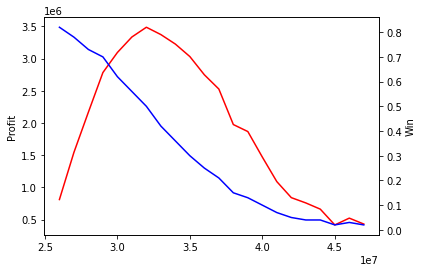

In [16]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(df_total_group['offer_i'],df_total_group['profit_expected'],color='r')
ax1.plot(df_total_group['offer_i'],df_total_group['win_expected'],color='b')
ax.set_ylabel('Profit')
ax1.set_ylabel('Win')